# Lab 11 CNN(Convolutional Nueral Network)

## Lab11-0-cnn_basics

In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


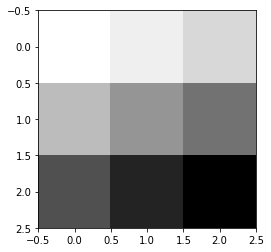

In [2]:
sess = tf.InteractiveSession()
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

## 1 filter (2,2,1,1) with padding: VALID

weight.shape = 1 filter (2 , 2 , 1, 1)
![image](https://cloud.githubusercontent.com/assets/901975/24833375/c0d9c262-1cf9-11e7-9efc-5dd6fe0fedb0.png)

imag:
 [[[[ 1.]
   [ 2.]
   [ 3.]]

  [[ 4.]
   [ 5.]
   [ 6.]]

  [[ 7.]
   [ 8.]
   [ 9.]]]]
image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[[[ 12.]
   [ 16.]]

  [[ 24.]
   [ 28.]]]]
[[ 12.  16.]
 [ 24.  28.]]


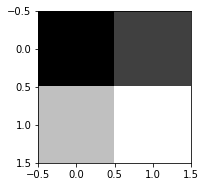

In [3]:
print("imag:\n", image) # image의 형태 확인
print("image.shape", image.shape)
weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID') # padding 안준 경우 => convolution 전에 비해 1씩 줄어듬
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape) # shape이 2x2x1 로 변화
print(conv2d_img) # 1개의 filter를 거친 결과
conv2d_img = np.swapaxes(conv2d_img, 0, 3) # 0과 3축을 transpose ??? 왜하는 거지?? 안해도 됨
# print("conv2_img transpose\n", conv2d_img) # 바뀌었는지 확인
for i, one_img in enumerate(conv2d_img):  # enumerate(리스트) : 리스트의 index와 원소를 같이 반환해줌
    print(one_img.reshape(2,2))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(2,2), cmap='gray') # plt.subplot(1,2, i+1) : R의 par(mfrow=c(1,2))와 같은 기능

## 1 filter (2,2,1,1) with padding:SAME
![image](https://cloud.githubusercontent.com/assets/901975/24833381/fd01869e-1cf9-11e7-9d59-df08c7c6e5c4.png)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 1)
conv2d_img.shape (1, 3, 3, 1)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]


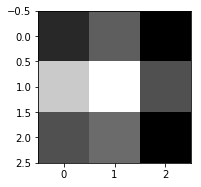

In [4]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.]],[[1.]]],
                      [[[1.]],[[1.]]]])
print("weight.shape", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME') # padding을 준 경우 (0 padding) => convolution 전과 후의 shape이 같음
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape) # 3x3x1
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters (2,2,1,3)

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[ 12.  16.   9.]
 [ 24.  28.  15.]
 [ 15.  17.   9.]]
[[ 120.  160.   90.]
 [ 240.  280.  150.]
 [ 150.  170.   90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


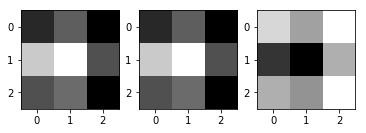

In [5]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print("weight.shape", weight.shape) # 2x2의 weight을 3개 사용(filter가 3개)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME') # 1 stride, zero padding 사용
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape) # 3x3x3
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

## MAX POOLING
![image](https://cloud.githubusercontent.com/assets/901975/23337676/bd154da2-fc30-11e6-888c-d86bc2206066.png)

![image](https://cloud.githubusercontent.com/assets/901975/23340355/a4bd3c08-fc6f-11e6-8a99-1e3bbbe86733.png)


In [6]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='VALID')
print(pool.shape)
print(pool.eval())

(1, 1, 1, 1)
[[[[ 4.]]]]


## SAME: Zero paddings

![image](https://cloud.githubusercontent.com/assets/901975/23340337/71b27652-fc6f-11e6-96ef-760998755f77.png)

In [7]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1],
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

(1, 2, 2, 1)
[[[[ 4.]
   [ 3.]]

  [[ 2.]
   [ 1.]]]]


### MNIST data로 간단한 CNN 구현

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
# Check out https://www.tensorflow.org/get_started/mnist/beginners for
# more information about the mnist dataset

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


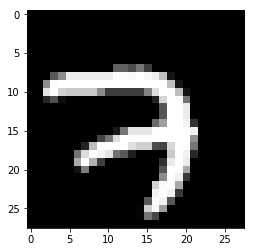

In [9]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

C:\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_3:0", shape=(1, 14, 14, 5), dtype=float32)


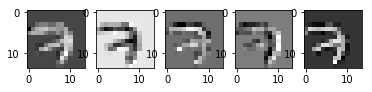

In [10]:
# 1번 convolution
sess = tf.InteractiveSession()

img = img.reshape(-1,28,28,1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) # 3x3 filter 5개 사용
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') # 2 stride, zero padding
print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool_2:0", shape=(1, 7, 7, 5), dtype=float32)


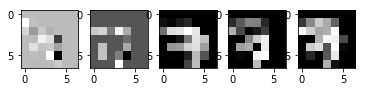

In [11]:
# pooling
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') # 2 stride, zero padding, 2x2의 크기로 max pooling 시행
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')